In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
from shutil import rmtree
from pathlib import Path
from tqdm import tqdm
import pandas as pd
import numpy as np
import json



In [7]:
## molecular analysis
## test group 1
old_test = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/molecular-design/runs/saved_runs/xtb-N32-n1-e2f8b5-10Aug23-163733')
test = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/molecular-design/runs/20231007_104929/xtb-N8-n1-34b578-07Oct23-025025') # 8 workers 56 cores
test2 = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/molecular-design/runs/20231007_171225/xtb-N7-n1-ec34f4-07Oct23-091247') # 7 workers 8 cores cpu
test3 = Path('/home/lizz_lab/cse12232433/project/colmena/multisite_/molecular-design/runs/20231007_213856/xtb-N7-n1-9fcc2a-07Oct23-133927') # 7 workers 8 cores gpu

In [4]:
### Load the data
## for molecule design
task_type = ['inference-results', 'training-results', 'simulation-results']
task_color = {'run_simulation': 'blue', 'retrain_mpnn': 'red', 'evaluate_mpnn': 'yellow'}
def load_results(path: Path, task_type) -> pd.DataFrame:
    """Load the results from a run.
    
    Args:
        path: Path to the run directory.
    Returns:
        Dataframe of all results
    """
    
    # Loop over inference, training, and simulation results
    output = []
    for task in task_type:
        # Load the results
        data = path / f'{task}.json'
        assert data.is_file(), f'Could not find {data}'
        results = pd.read_json(data, lines=True)
        output.append(results)
    output = pd.concat(output)
    return output

def get_wct(results:pd.DataFrame) -> int:
    """get whole completion time.
    
    Args: 
        results dataframe of the workflow
    Returns:
        workflow completion time from task created to task results received.
    """
    start_time = results['time_created'].min()
    end_time = results['time_result_received'].max()
    return int(end_time - start_time)

In [9]:
def time_line_graph(results: pd.DataFrame, task_color: dict):
    """plot time_line_graph of each task.

    Args:
        results (pd.DataFrame): results object of the workflow from colmema.
        task_color (dict): color of each task.  
    """ 
    #### time line of task
    # rows = len(results)
    fig = plt.figure(figsize=(30, 20))
    task_timeline = results
    task_timeline.sort_values('time_compute_started', inplace=True, ignore_index=True)
    start_time = task_timeline['time_compute_started'].loc[0]
    wct = get_wct(task_timeline)
    plt.text(0, len(task_timeline)-1, f'Workflow completion time: {wct}', ha='left', va='center', fontsize=20, color='red')
    for index, row in task_timeline.iterrows():
        print(f"{row['method']}: {row['time_compute_started']}: {row['time_running']}")
        method = str(row['method'])+str(index)+"time:"+str(row['time_running'])
        time = row['time_running']
        plt.barh(index, time, left=row['time_compute_started'] - start_time, color=task_color[row['method']])
        plt.text(row['time_compute_started'] - start_time, index, method, ha='left', va='center')
    
    plt.xlabel('Time')
    plt.ylabel('Task')
    plt.tight_layout()
    plt.grid(True)
    plt.show()

retrain_mpnn: 1696647040.369256: 1182.4007244664244
retrain_mpnn: 1696647040.645211: 1518.0278293727897
retrain_mpnn: 1696647040.660202: 1063.5333276400343
evaluate_mpnn: 1696648105.885083: 30.881672725081444
evaluate_mpnn: 1696648114.910213: 31.69072803715244
evaluate_mpnn: 1696648139.441217: 30.433034381829202
evaluate_mpnn: 1696648148.662542: 30.412867960054427
evaluate_mpnn: 1696648172.353029: 29.26859840704128
evaluate_mpnn: 1696648181.515961: 31.808205383829772
evaluate_mpnn: 1696648203.168555: 26.483290574979037
evaluate_mpnn: 1696648224.055069: 27.216648489702493
evaluate_mpnn: 1696648224.750523: 27.702445175964385
evaluate_mpnn: 1696648232.530325: 26.401712391059846
evaluate_mpnn: 1696648253.233527: 27.472527724225074
evaluate_mpnn: 1696648254.824419: 27.46017914218828
evaluate_mpnn: 1696648261.436204: 28.20802542101592
evaluate_mpnn: 1696648282.889381: 23.814993729814887
evaluate_mpnn: 1696648559.797624: 27.957875612191856
evaluate_mpnn: 1696648560.196279: 25.16114354506135
e

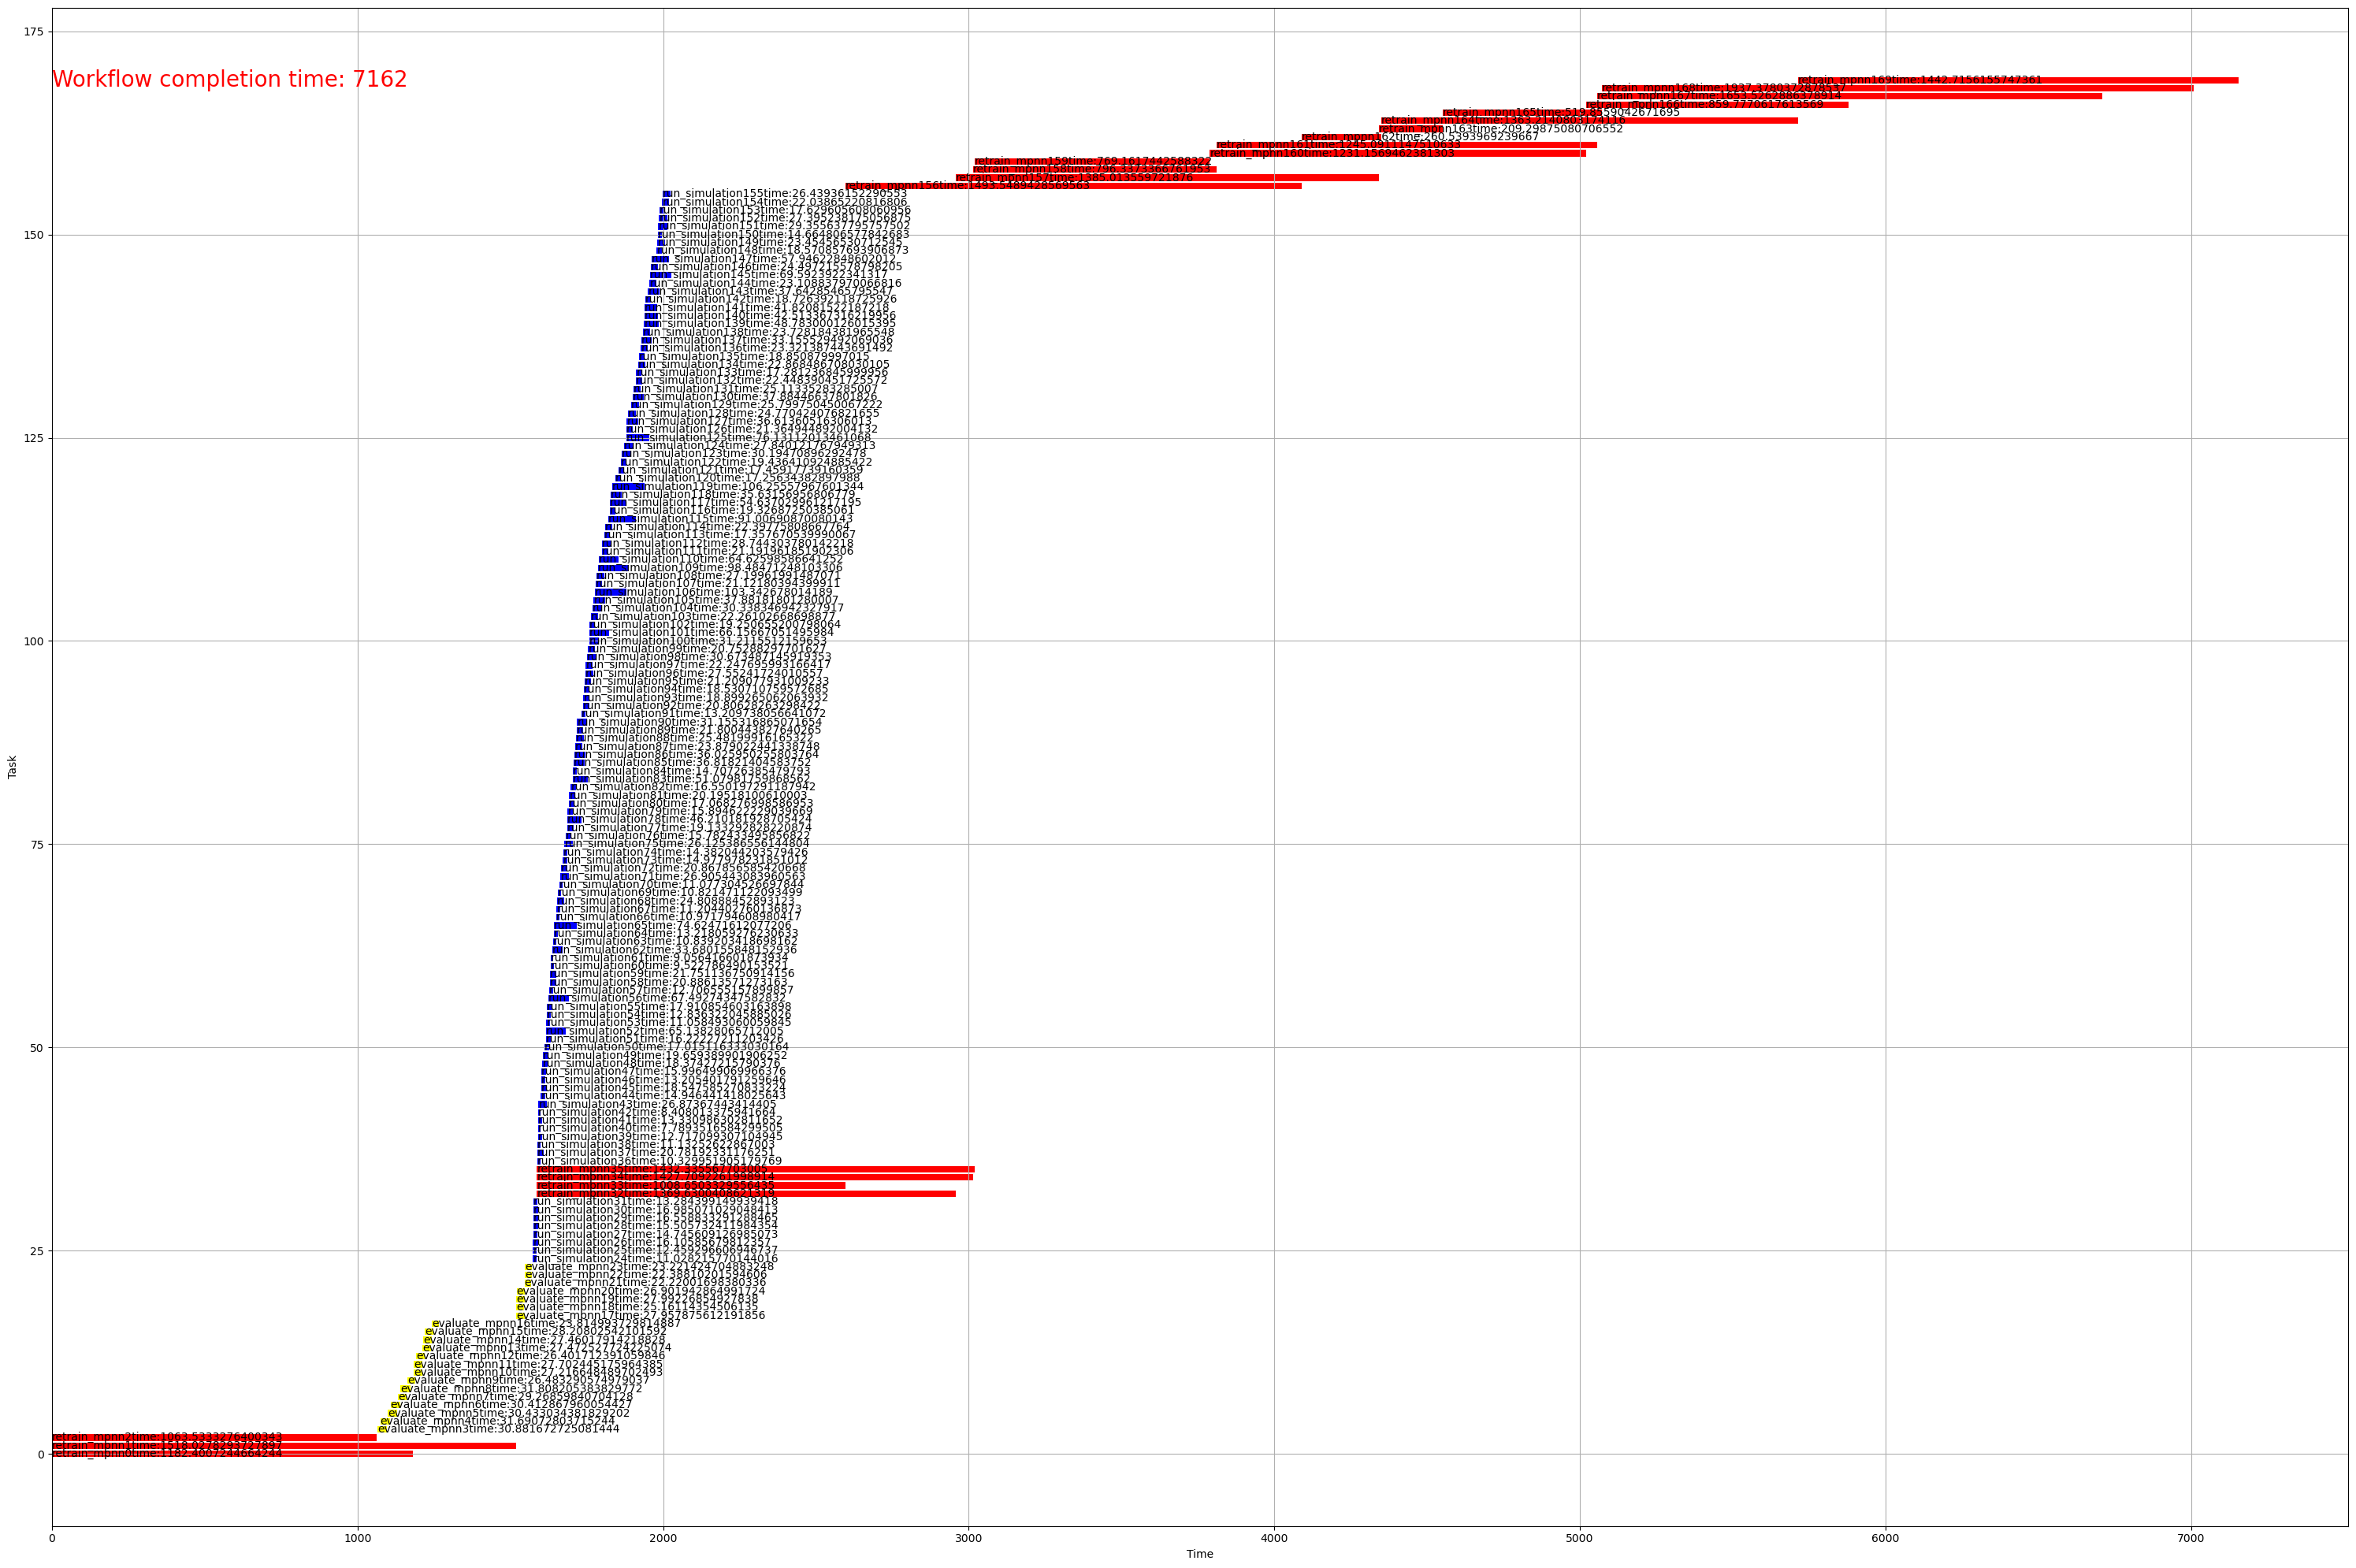

In [10]:
# fine-tuning surrogates, 64 threads
# task_type = ['sampling-results', 'training-results', 'simulation-results', 'inference-results']
# task_color = {'run_calculator': 'blue', 'train': 'red', 'run_sampling': 'yellow', 'evaluate': 'green'}
results = load_results(test, task_type=task_type)
time_line_graph(results=results, task_color=task_color)

retrain_mpnn: 1691685466.621303: 81.36718778312206
retrain_mpnn: 1691685466.764188: 79.79135167808272
retrain_mpnn: 1691685466.82452: 70.19868533313274
retrain_mpnn: 1691685466.980746: 57.60286928713322
retrain_mpnn: 1691685524.646161: 80.46453482308425
retrain_mpnn: 1691685537.050857: 69.50932551710866
evaluate_mpnn: 1691685546.70278: 9.25565446098335
evaluate_mpnn: 1691685548.118877: 8.584165453910828
evaluate_mpnn: 1691685556.996317: 8.352525118039921
evaluate_mpnn: 1691685557.764238: 8.416042685043067
evaluate_mpnn: 1691685566.190448: 8.35980074503459
evaluate_mpnn: 1691685566.981134: 8.230650760931894
evaluate_mpnn: 1691685575.519003: 8.316578881815076
evaluate_mpnn: 1691685576.166237: 8.349251681007445
evaluate_mpnn: 1691685584.57436: 8.410889795981348
evaluate_mpnn: 1691685585.244443: 8.22298163198866
evaluate_mpnn: 1691685593.826311: 8.27534823003225
evaluate_mpnn: 1691685594.292953: 8.275484900921583
evaluate_mpnn: 1691685603.072807: 8.159506679978222
evaluate_mpnn: 1691685603

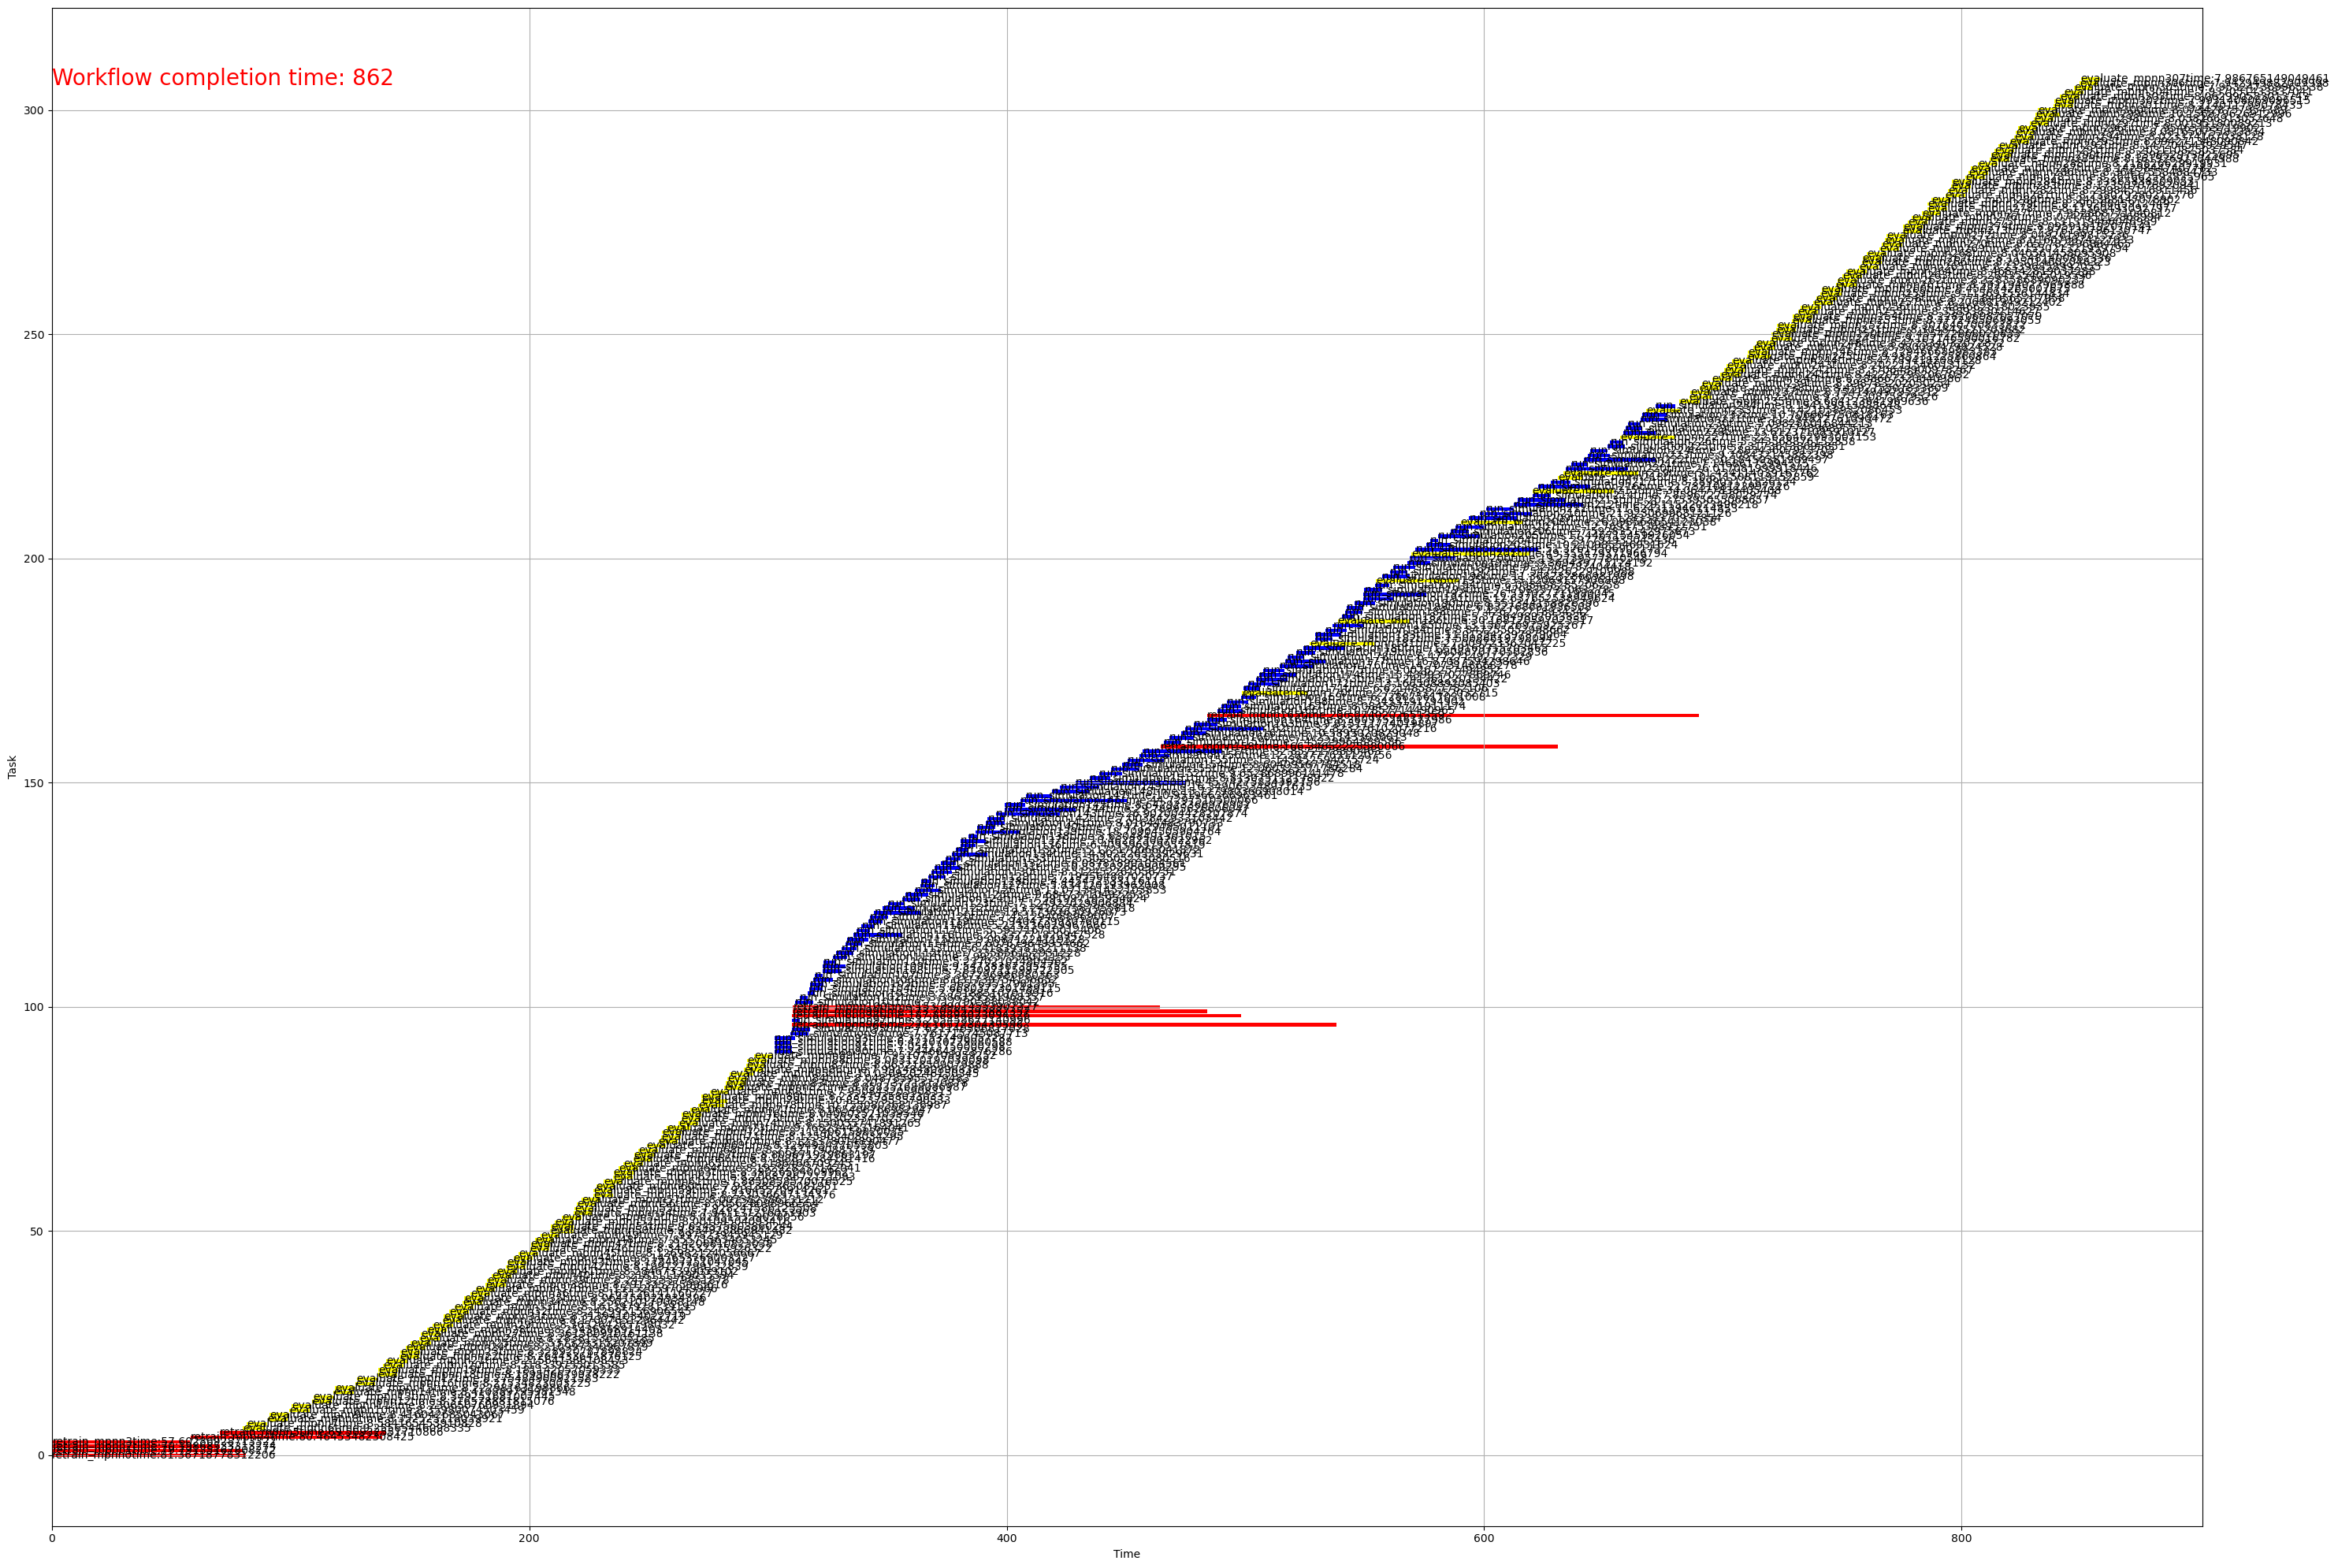

In [11]:
results = load_results(old_test, task_type=task_type)
time_line_graph(results=results, task_color=task_color)

retrain_mpnn: 1696669982.993701: 854.0971927009523
retrain_mpnn: 1696669983.034335: 1135.6889899279922
retrain_mpnn: 1696669983.147373: 1149.2691055680625
evaluate_mpnn: 1696670841.806763: 55.63656156603247
evaluate_mpnn: 1696670849.242334: 58.29115582909435
evaluate_mpnn: 1696670901.7287: 53.67413048027083
evaluate_mpnn: 1696671122.137036: 52.92677384195849
evaluate_mpnn: 1696671123.32925: 55.864968318957835
evaluate_mpnn: 1696671125.11323: 52.60500102676451
evaluate_mpnn: 1696671135.390104: 50.234511718619615
evaluate_mpnn: 1696671179.704619: 40.075597235001624
evaluate_mpnn: 1696671180.988688: 39.89526566211134
run_simulation: 1696671227.814992: 5.703084985725582
run_simulation: 1696671227.814994: 5.607509334105998
run_simulation: 1696671227.815021: 5.605207407381386
run_simulation: 1696671227.815166: 5.000117784366012
run_simulation: 1696671227.815188: 4.76875371998176
run_simulation: 1696671227.815261: 5.304917667992413
run_simulation: 1696671227.815307: 5.061211579944938
retrain_

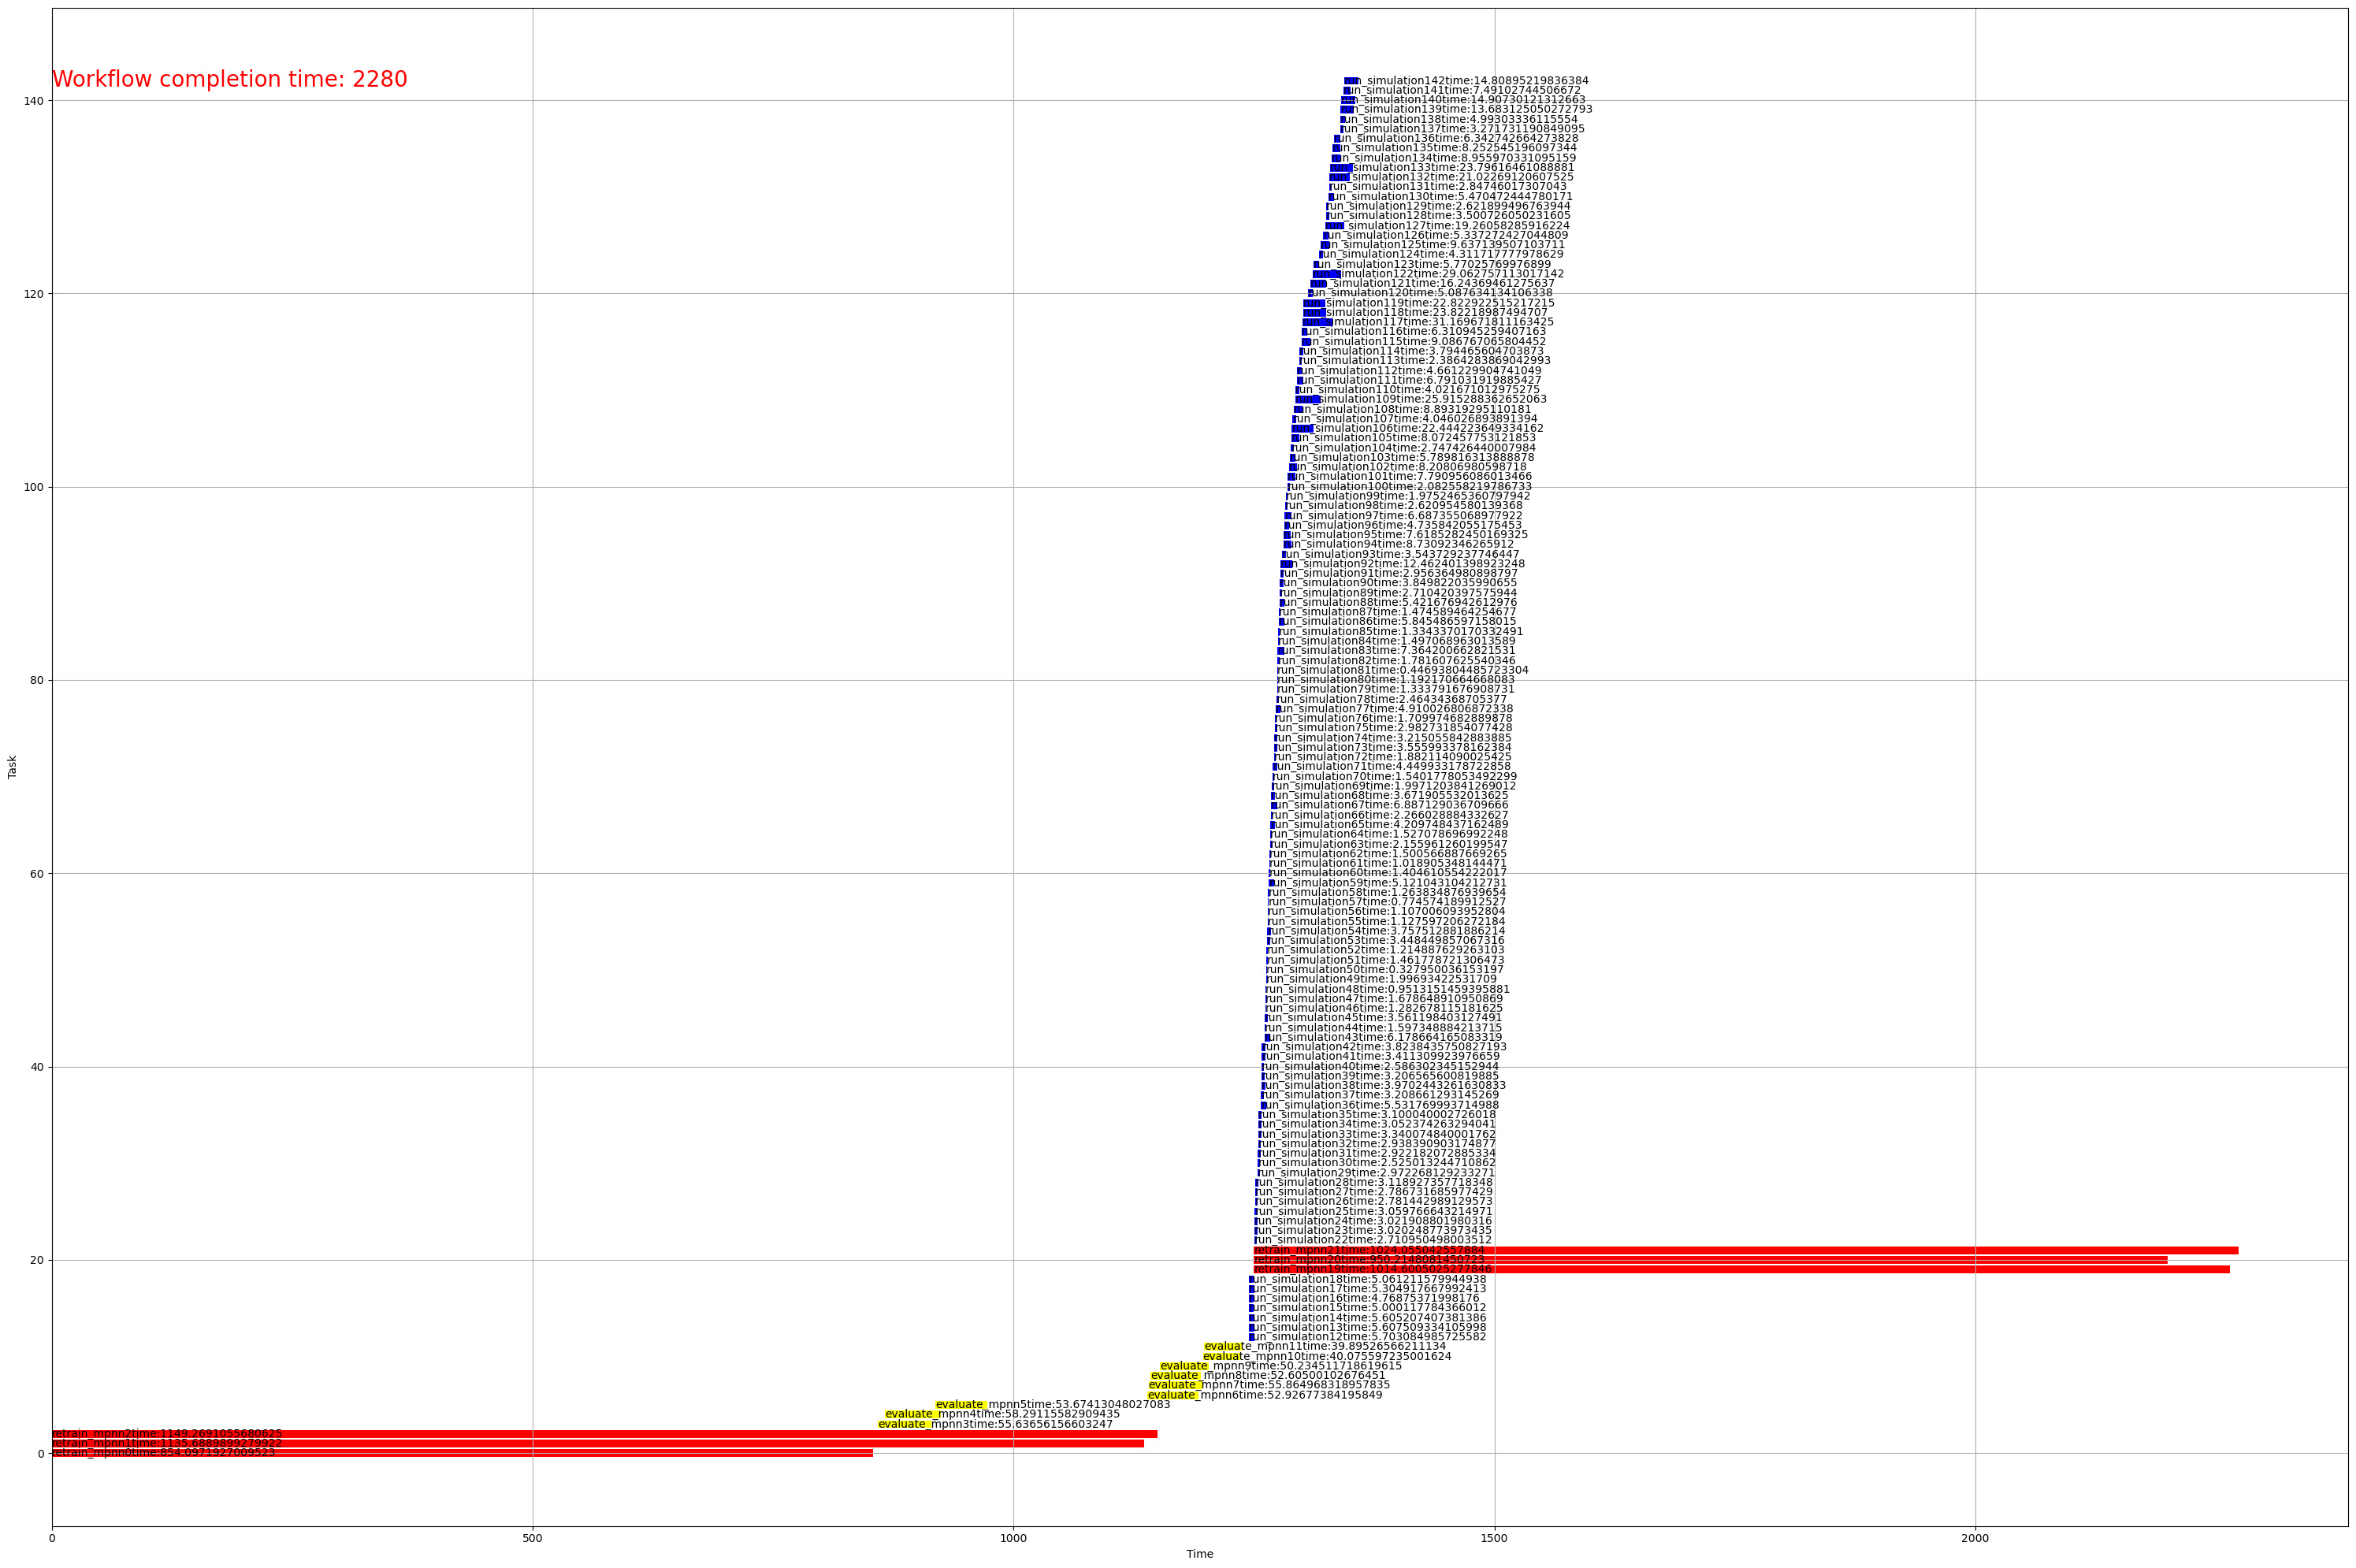

In [12]:

results = load_results(test2, task_type=task_type)
time_line_graph(results=results, task_color=task_color)

retrain_mpnn: 1696685981.028081: 30.913918470032513
retrain_mpnn: 1696685981.028352: 30.721385507145897
retrain_mpnn: 1696685981.060274: 30.755924536148086
evaluate_mpnn: 1696686013.966415: 13.829793758923188
evaluate_mpnn: 1696686015.073289: 14.105449260910973
evaluate_mpnn: 1696686016.164307: 14.109205966815352
evaluate_mpnn: 1696686020.830601: 15.968590594828129
evaluate_mpnn: 1696686030.875289: 13.36911594402045
evaluate_mpnn: 1696686032.527638: 13.777565101860091
evaluate_mpnn: 1696686033.574324: 13.14699349598959
evaluate_mpnn: 1696686039.425609: 13.892053548945114
evaluate_mpnn: 1696686047.319171: 12.811714241979644
run_simulation: 1696686063.648861: 3.774664460914209
run_simulation: 1696686063.648861: 4.662735672201961
run_simulation: 1696686063.648862: 3.941584841813892
run_simulation: 1696686063.648927: 3.876537281088531
run_simulation: 1696686063.648947: 4.375574039062485
run_simulation: 1696686063.648964: 4.408550031948835
run_simulation: 1696686063.658092: 4.21990054892376

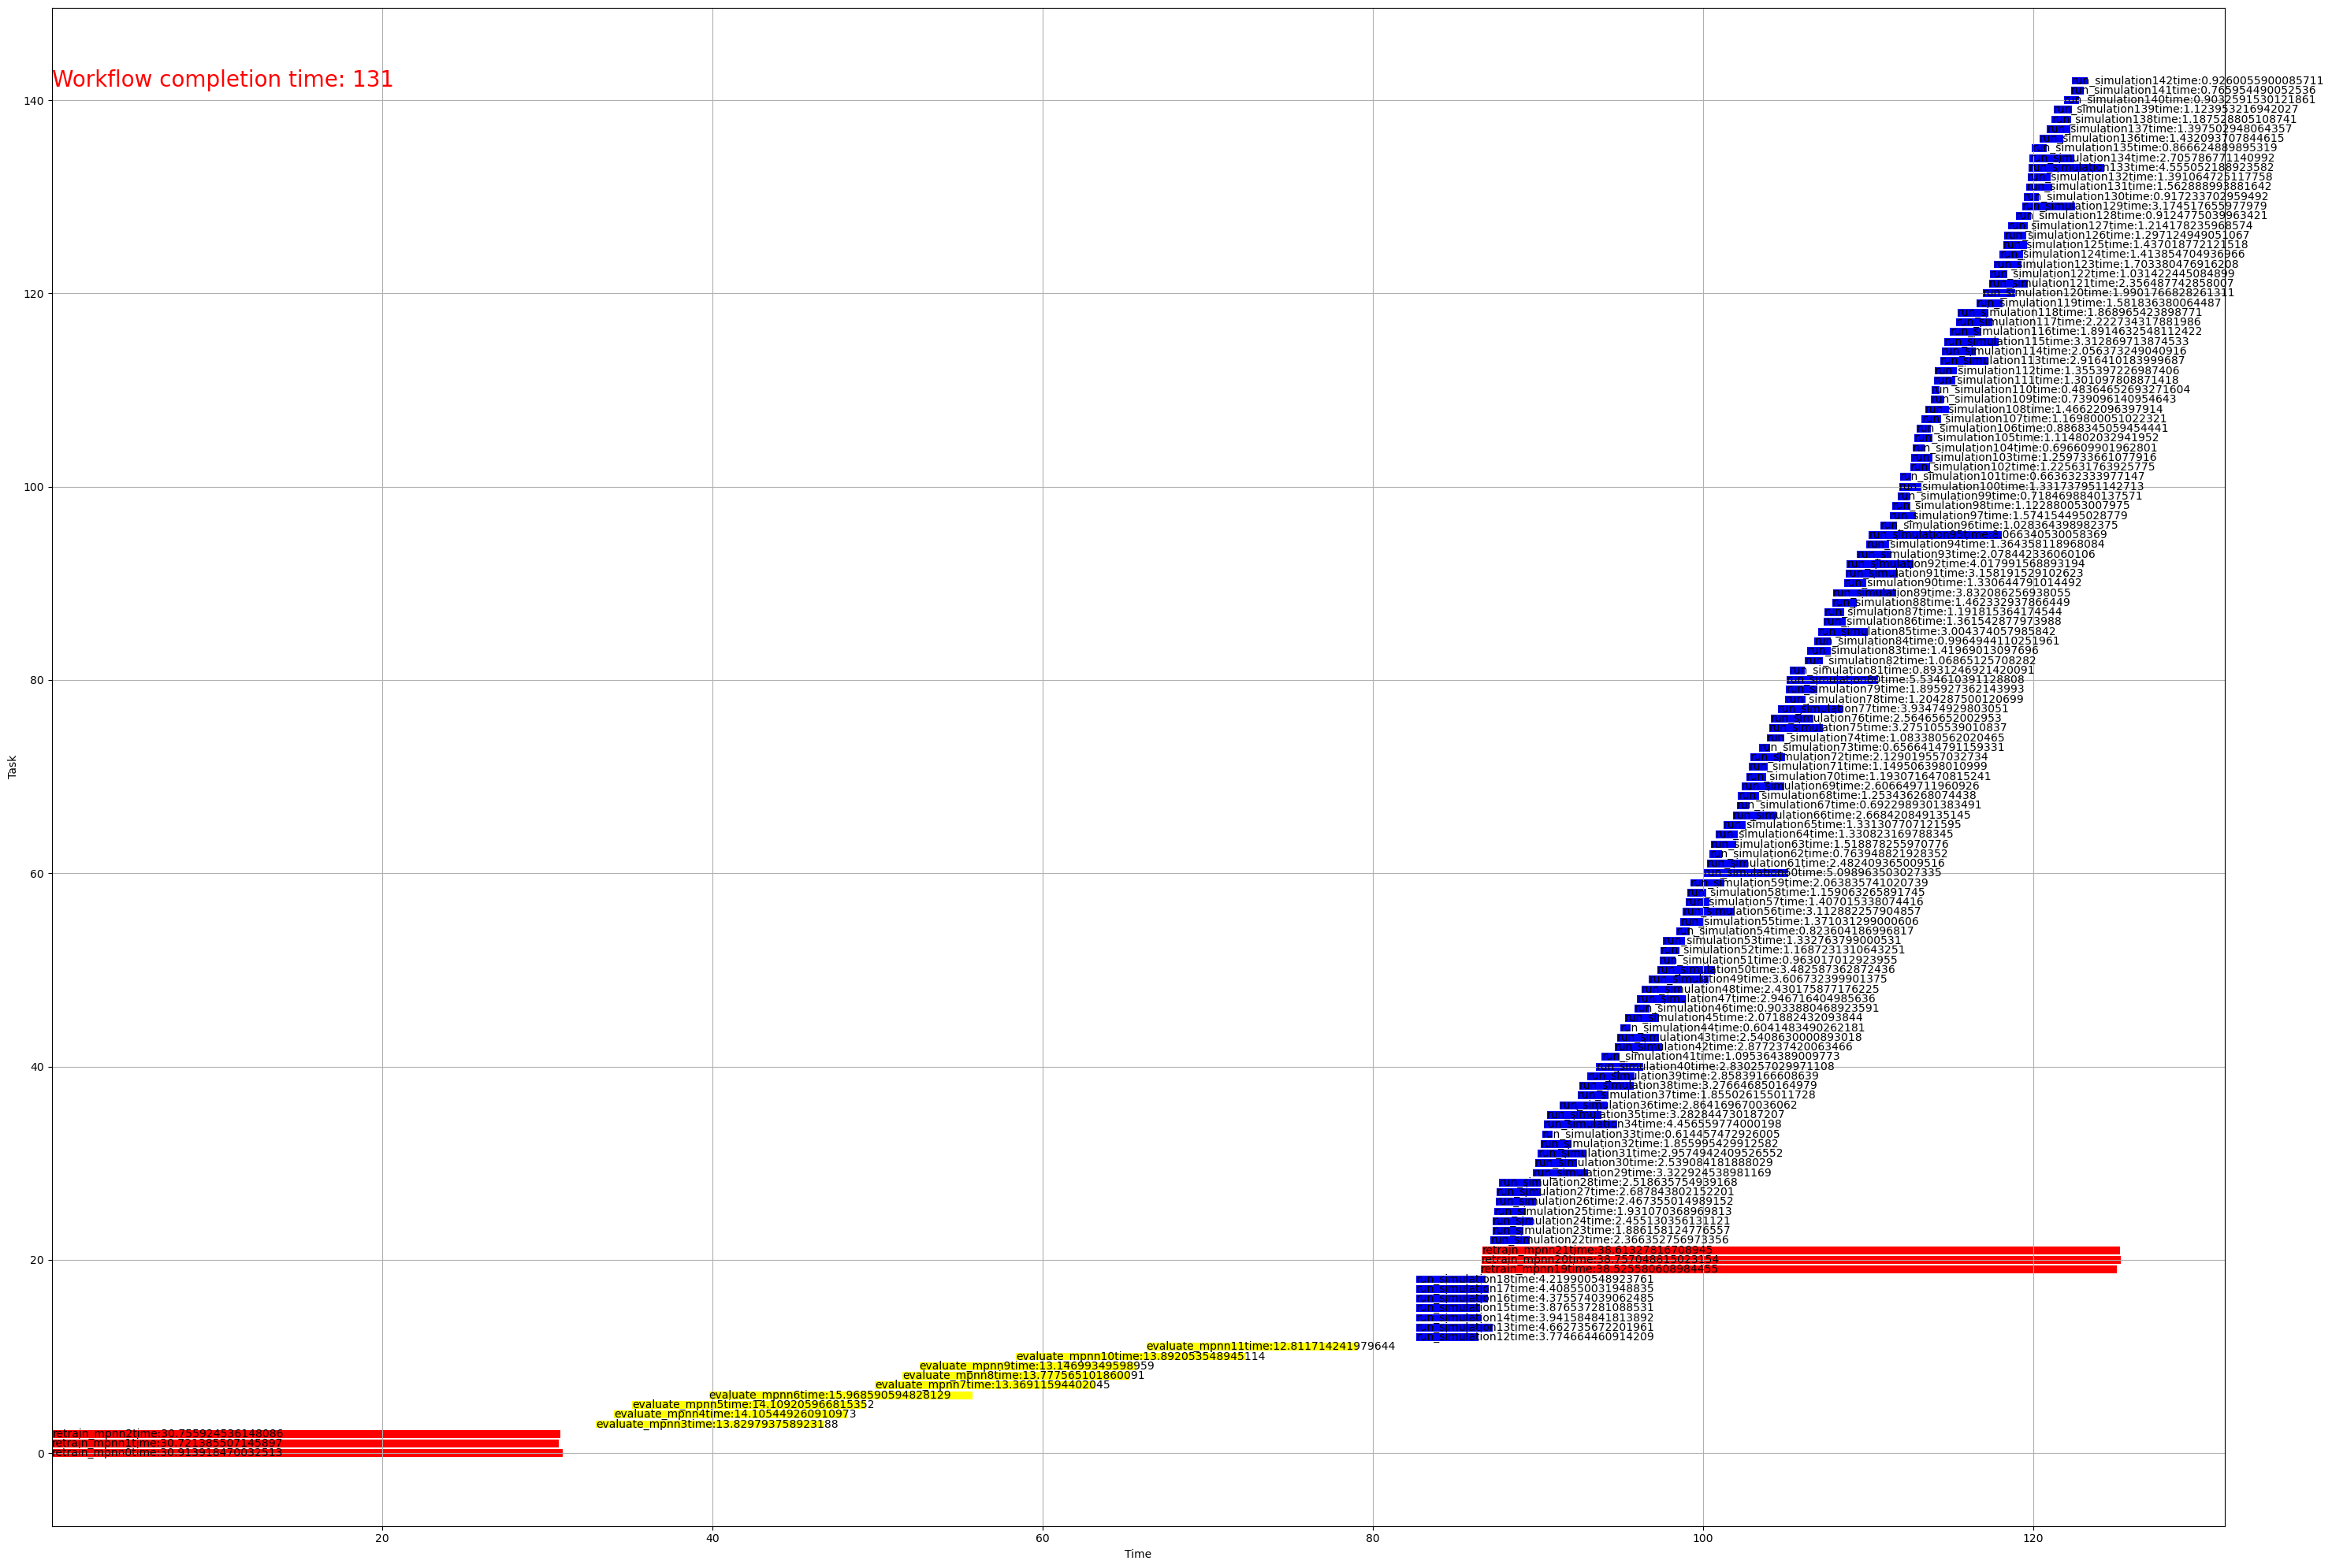

In [13]:

results = load_results(test3, task_type=task_type)
time_line_graph(results=results, task_color=task_color)

In [14]:
### task on nodes and gpu
row_count = len(results)
print(row_count)

143
